# Goodreads Book Reading Data Analysis

Simple Data Analysis of Goodreads.com Reading History. 

NOTE: You'll need to first run [goodreads_downloader.ipynb](https://github.com/markwk/qs_ledger/blob/master/goodreads/goodreads_downloader.ipynb) in order to download your book reading history from Goodreads API. 

----

In [1]:
# Dependencies
import numpy as np, string, re, pytz
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

----

## Import Data

In [2]:
all_books = pd.read_csv("data/books.csv")
all_books_read = pd.read_csv("data/books_all_read.csv")

books = pd.read_csv("data/books_read_history.csv")

In [3]:
# Book Reading Summary
print('====== Goodreads Summary ======')
print('{:,} total books in your Goodreads account'.format(len(all_books)))
print('{:,} total number of books read'.format(len(all_books_read)))
print('{:,} books currently reading'.format(len(all_books[all_books['shelves'] == 'currently-reading'])))
print('{:,} books still to read'.format(len(all_books[all_books['shelves'] == 'to-read'])))

====== Goodreads Summary ======
1,384 total books in your Goodreads account
899 total number of books read
3 books currently reading
438 books still to read


-----

# General Data Analysis

## Monthly Analysis

In [4]:
month_counts = books['mnth_yr'].value_counts().sort_index()
month_counts.columns = ['Count']
month_counts.tail(10)

2018-03    7
2018-04    4
2018-05    8
2018-06    6
2018-07    4
2018-08    4
2018-09    4
2018-10    6
2018-11    3
2018-12    6
Name: mnth_yr, dtype: int64

In [5]:
# total months
len(month_counts)

71

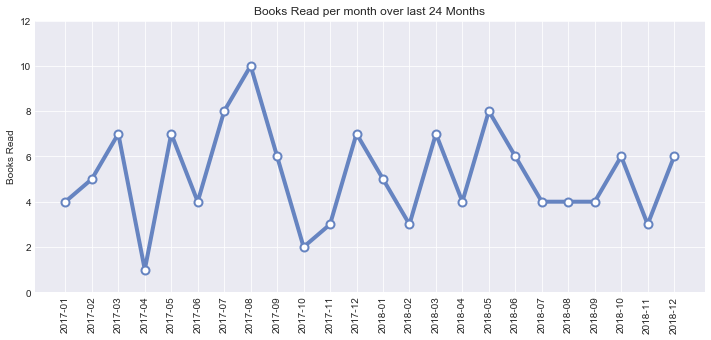

In [6]:
# Books Read by Month
dataset = month_counts.tail(24)
chart_title = 'Books Read per month over last 24 Months'

n_groups = len(dataset)
index = np.arange(n_groups)

plt.style.use('seaborn-darkgrid')
ax = dataset.plot(kind='line', figsize=[12, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.set_ylim(0, 12)
ax.set_xticks(index)
ax.set_ylabel('Books Read')
plt.xticks(index, dataset.index, rotation=90)
ax.set_title(chart_title)
plt.show()

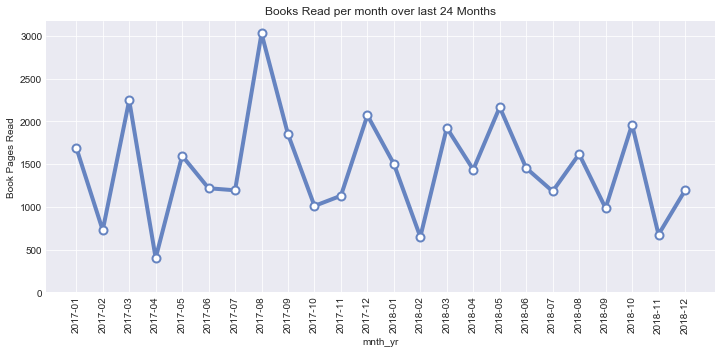

In [7]:
# Books Pages Completed by Month
month_pages = books.groupby(['mnth_yr'])['num_page'].sum()

dataset = month_pages.tail(24)
chart_title = 'Books Read per month over last 24 Months'

n_groups = len(dataset)
index = np.arange(n_groups)

plt.style.use('seaborn-darkgrid')
ax = dataset.plot(kind='line', figsize=[12, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

ax.yaxis.grid(True)
ax.xaxis.grid(True)
max = dataset.max() + (dataset.max()  * 0.05)
ax.set_ylim(0, max)
ax.set_xticks(index)
ax.set_ylabel('Book Pages Read')
# ax.set_xlabel('')
plt.xticks(index, dataset.index, rotation=90)
ax.set_title(chart_title)
plt.show()

----

# Yearly Analysis

In [8]:
year_counts = books['year'].value_counts().sort_index()
year_counts.columns = ['Count']
year_counts.tail(10)

2008     1
2013    25
2014    43
2015    46
2016    62
2017    64
2018    60
Name: year, dtype: int64

In [9]:
# Removing an outlier
year_counts.drop([2008], inplace=True)

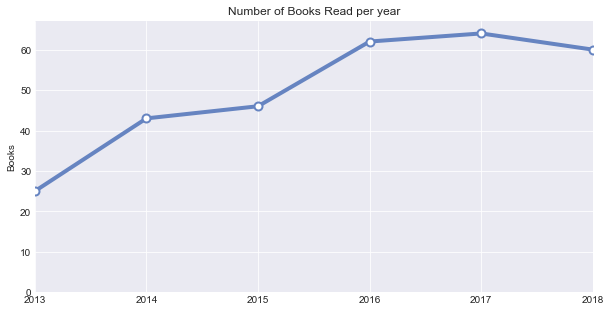

In [10]:
dataset = year_counts
chart_title = 'Number of Books Read per year'

plt.style.use('seaborn-darkgrid')
ax = year_counts.plot(kind='line', figsize=[10, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

ax.set_xlim((year_counts.index[0], year_counts.index[-1]))

ax.yaxis.grid(True)
ax.xaxis.grid(True)
max = year_counts.max() + (year_counts.max()  * 0.05)
ax.set_ylim(0, max)
ax.set_xticks(dataset.index)
ax.set_ylabel('Books')
ax.set_xlabel('')
ax.set_title(chart_title)

plt.show()

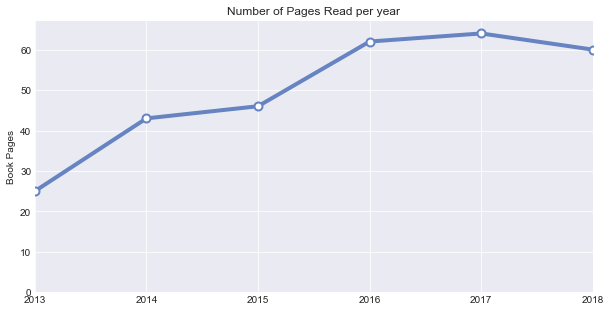

In [11]:
# Yearly Pages Sum
year_pages = books.groupby(['year'])['num_page'].sum()
# Removing an outlier
year_pages.drop([2008], inplace=True)
dataset = year_pages
chart_title = 'Number of Pages Read per year'

plt.style.use('seaborn-darkgrid')
ax = year_counts.plot(kind='line', figsize=[10, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

ax.set_xlim((year_counts.index[0], year_counts.index[-1]))

ax.yaxis.grid(True)
ax.xaxis.grid(True)
max = year_counts.max() + (year_counts.max()  * 0.05)
ax.set_ylim(0, max)
ax.set_xticks(dataset.index)
ax.set_ylabel('Book Pages')
ax.set_xlabel('')
ax.set_title(chart_title)

plt.show()

-----

# Time Period in Review

Example using Year in Review

In [12]:
target_period = 2018
period_books = books[books['year'] == target_period]

In [13]:
len(period_books)

60

In [14]:
month_counts = period_books['mnth_yr'].value_counts().sort_index()
month_counts.columns = ['Count']

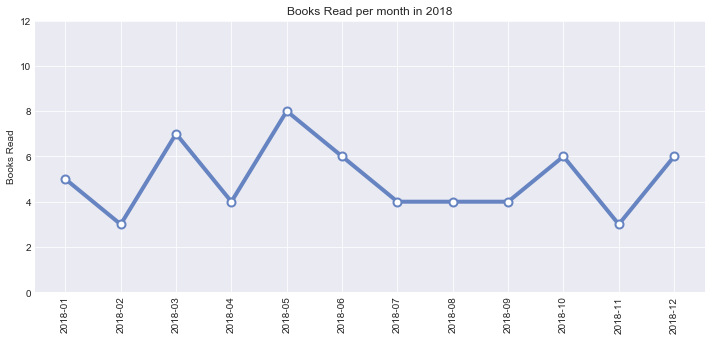

In [15]:
# Books Read Count
dataset = month_counts
chart_title = 'Books Read per month in ' + str(target_period)

n_groups = len(dataset)
index = np.arange(n_groups)

plt.style.use('seaborn-darkgrid')
ax = dataset.plot(kind='line', figsize=[12, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.set_ylim(0, 12)
ax.set_xticks(index)
ax.set_ylabel('Books Read')
# ax.set_xlabel('')
plt.xticks(index, dataset.index, rotation=90)
ax.set_title(chart_title)

plt.show()

In [16]:
month_pages
month_pages.columns = ['Pages']

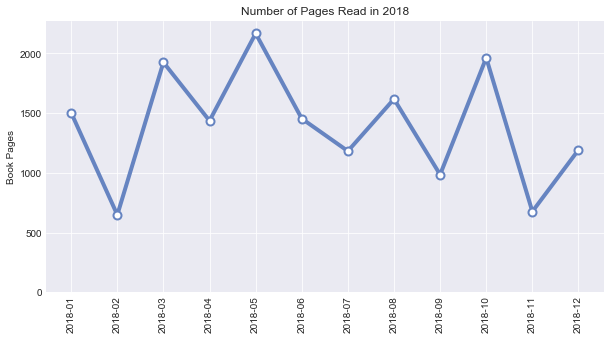

In [17]:
# Period Pages Sum
month_pages = period_books.groupby(['mnth_yr'])['num_page'].sum()
month_pages.columns = ['Pages']

dataset = month_pages
chart_title = 'Number of Pages Read in ' + str(target_period)

plt.style.use('seaborn-darkgrid')
ax = dataset.plot(kind='line', figsize=[10, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

n_groups = len(dataset)
index = np.arange(n_groups)

ax.yaxis.grid(True)
ax.xaxis.grid(True)
max = dataset.max() + (dataset.max()  * 0.05)
ax.set_ylim(0, max)
plt.xticks(index, dataset.index, rotation=90)
ax.set_ylabel('Book Pages')
ax.set_xlabel('')
ax.set_title(chart_title)

plt.show()

In [18]:
# Book Reading Summary

from IPython.core.display import Image, display

print('====== Goodreads Summary for ' + str(target_period) + ' ======')
print('{:,} total books read'.format(len(period_books)))
print('{:,} total number of pages read'.format(period_books['num_page'].sum()))
period_books_with_rating = period_books[period_books['rating'] != 0]
print('Average Rating of {:,}'.format(round(period_books_with_rating.rating.mean(), 2)))
print(' ')
average_length = round(period_books['num_page'].mean(),0)
print('{:,} average number of pages per book'.format(average_length))
print(' ')
max_length_book = period_books[period_books['num_page'] == period_books['num_page'].max()].head(1)
print('Longest Book Read:')
display(Image(url=max_length_book.image_url.item()))
print('{:} by {:} at {:,} pages'.format(max_length_book.title.item(), max_length_book.author.item(), max_length_book.num_page.item() ))
print(' ')
min_length_book = period_books[period_books['num_page'] == period_books['num_page'].min()].head(1)
print('Shortest Book Read:')
display(Image(url=min_length_book.image_url.item()))
print('{:} by {:} at {:,} pages'.format(min_length_book.title.item(), min_length_book.author.item(), min_length_book.num_page.item() ))

print(' ')
print('Top Rated Books:')
for index, row in period_books[period_books['rating'] == period_books['rating'].max()].iterrows():
    display(Image(url=row["image_url"]))
    print(row["title_without_series"] + " by " + row["author"])
    print("---------------")

====== Goodreads Summary for 2018 ======
60 total books read
16,749.0 total number of pages read
Average Rating of 3.86
 
335.0 average number of pages per book
 
Longest Book Read:


Postwar: A History of Europe Since 1945 by Tony Judt at 933.0 pages
 
Shortest Book Read:


The Churn (The Expanse, #0.2) by James S.A. Corey at 2.0 pages
 
Top Rated Books:


Postwar: A History of Europe Since 1945 by Tony Judt
---------------


The Killer Angels by Michael Shaara
---------------


Physics of the Future: How Science Will Shape Human Destiny and Our Daily Lives by the Year 2100 by Michio Kaku
---------------


The Blue Zones: Lessons for Living Longer From the People Who've Lived the Longest by Dan Buettner
---------------


Leonardo da Vinci by Walter Isaacson
---------------


Tibet: A History by Sam Van Schaik
---------------


The Heart of the World: A Journey to the Last Secret Place by Ian Baker
---------------


The Lever of Riches: Technological Creativity and Economic Progress by Joel Mokyr
---------------


New Developments in Goal Setting and Task Performance by Edwin A. Locke
---------------


Why We Sleep: Unlocking the Power of Sleep and Dreams by Matthew Walker
---------------
